# Kaliebrierung der Kraft Messdosen

## Mit diesem Programm werden die Kraftmessdosen Kallibiert

Import der Pakete


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Im Nachfolgendenfeld muss der Link angegeben werden

In [2]:
file = 'Testlauf_2_Kraftgeregelt.XLSX'

Für den Import des Excels müssen eine Varaiblen definiert werden. Danach kann das Excel mit Pandas importiert werden

In [3]:
name = ['Zeit', 'Referenz kN', 'Prüfling kN']
data = pd.read_excel(file, header=None, names=name)

Im Nächsten Schritt werden die ersten Zeilen gelöscht.

In [4]:
delet = np.arange(0, 49, 1)
Werte = data.drop(delet, axis=0)

In [5]:
Werte


,Zeit,Referenz kN,Prüfling kN
49,0,0.000018,-0.000001
50,0.2,0.000008,-0.000005
51,0.4,0.000016,-0.000005
52,0.6,-0.000014,0.000001
53,0.8,-0.000025,0.000001
...,...,...,...
2612,512.600024,-0.002568,-0.002834
2613,512.800024,-0.002585,-0.002833
2614,513.000024,-0.00261,-0.002833
2615,513.200024,-0.002602,-0.002831


Als nächstes werden die Spalten komplet in Numpy geladen.

In [6]:
Zeit = np.round(np.array(Werte['Zeit'], dtype='float64'), 1)
Referenz = np.array(Werte['Referenz kN'], dtype='float64')
Prüfling = np.array(Werte['Prüfling kN'], dtype='float64')

Es muss nun von Hand definert werden, ob es ein Zug oder Druckversuch ist.
Zugversuch = 1
Druckversuch = 0

In [7]:
Versuch = 0

Nun wird die Maximalkraft definiert. Diese wird immer Positiv eingegeben. Für die spätere Berechnung wird positiv oder negativ automatisch definiert.

In [8]:
F_max = 2
if Versuch == 0:
    F_max = F_max * -1
else:
    F_max = F_max * 1

Plot der gesamten Versuchsreihe für die Referenzmessdose

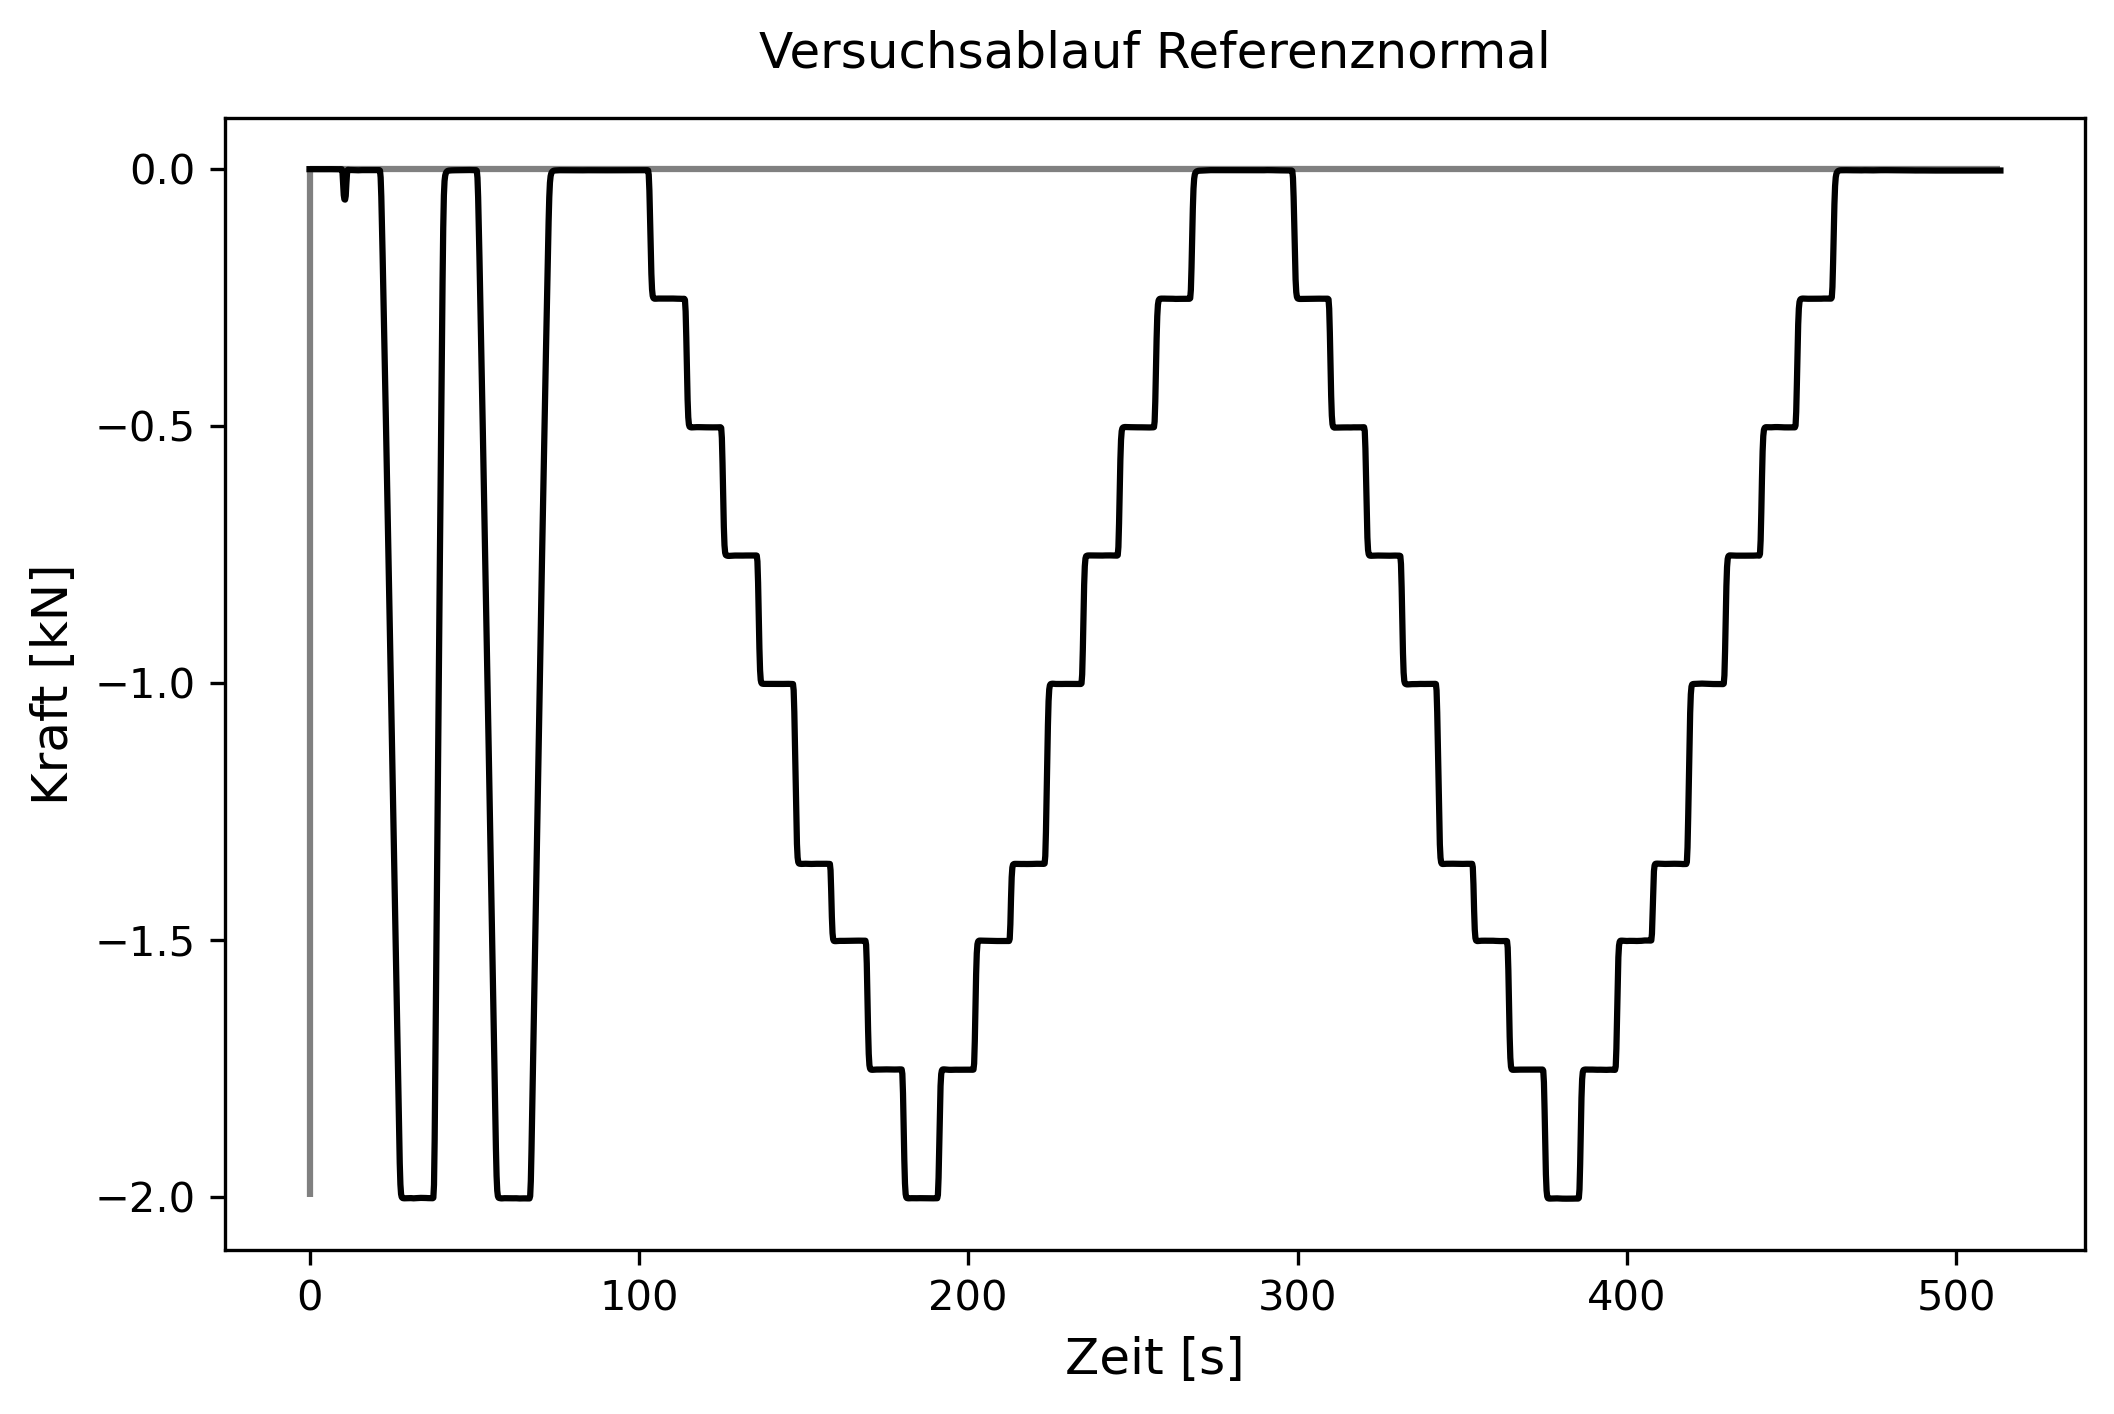

In [9]:
y_Beschriftung = np.linspace(0, F_max, num=5)
plt.figure(figsize=(8, 5), dpi=300)
plt.plot(Zeit,Referenz,color='black')
plt.hlines(0,min(Zeit),max(Zeit),colors='grey')
plt.vlines(min(Zeit),0,F_max,colors='grey')
plt.title('Versuchsablauf Referenznormal', pad=12,fontsize=12)
plt.xlabel('Zeit [s]' ,fontsize=12,)
plt.ylabel('Kraft [kN]' ,fontsize=12,)
plt.yticks(y_Beschriftung)
plt.show()

Die Laststufen für die Berechnung

In [10]:
Stufen = np.array([0.125, 0.25, 0.375, 0.5, 0.675, 0.75, 0.875, 1])
Laststufen = F_max * Stufen

In [11]:
Mittelwerte_Refernz = [[], [], [], [], [], [], [],  []]
Mittelwerte_Prüfling = [[], [], [], [], [], [], [], []]

In [12]:
x=2

In [13]:
Werte_F = Werte[(Werte['Referenz kN'] >= Laststufen[x] - 0.005) & (Werte['Referenz kN'] <= Laststufen[x] + 0.005)]
Werte_F_index = Werte[(Werte['Referenz kN'] >= Laststufen[x] - 0.005) & (Werte['Referenz kN'] <= Laststufen[x] + 0.005)].index.values
res = np.where(Werte_F_index[:-1] + 1 != Werte_F_index[1:])[0]

In [14]:
Werte_F_index

array([ 247,  680,  681,  682,  683,  684,  685,  686,  687,  688,  689,
        690,  691,  692,  693,  694,  695,  696,  697,  698,  699,  700,
        701,  702,  703,  704,  705,  706,  707,  708,  709,  710,  711,
        712,  713,  714,  715,  716,  717,  718,  719,  720,  721,  722,
        723,  724,  725,  726,  727,  728, 1228, 1229, 1230, 1231, 1232,
       1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243,
       1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254,
       1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265,
       1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276,
       1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667,
       1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678,
       1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689,
       1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700,
       1701, 1702, 1703, 1704, 1705, 2203, 2204, 22

In [15]:
res

array([  0,  49,  98, 147], dtype=int64)

In [16]:
res = res[res > 10]
res

array([ 49,  98, 147], dtype=int64)

In [17]:
print(len(Werte_F))
print(res[0] + 1)
print(res[1] + 1)
print(res[2] + 1)

197
50
99
148


In [18]:
X_max_1 = Werte_F[1:res[0] + 1]
X_max_2 = Werte_F[res[0] + 1:res[1] + 1]
X_max_3 = Werte_F[res[1] + 1:res[2] + 1]
X_max_4 = Werte_F[res[2] + 1:]

In [28]:
X_max_4

,Zeit,Referenz kN,Prüfling kN
2203,430.80002,-0.753366,-0.753902
2204,431.00002,-0.751974,-0.752503
2205,431.20002,-0.751611,-0.752128
2206,431.40002,-0.751561,-0.752086
2207,431.60002,-0.751638,-0.752152
2208,431.800021,-0.751714,-0.752225
2209,432.000021,-0.751753,-0.752289
2210,432.200021,-0.75182,-0.752395
2211,432.400021,-0.751966,-0.752544
2212,432.600021,-0.752098,-0.75268


In [29]:
print(Werte_F[res[2] + 10:-10])



            Zeit Referenz kN Prüfling kN
2212  432.600021   -0.752098    -0.75268
2213  432.800021   -0.752129   -0.752728
2214  433.000021     -0.7521   -0.752696
2215  433.200021   -0.752051   -0.752647
2216  433.400021   -0.752034   -0.752618
2217  433.600021   -0.752048    -0.75262
2218  433.800021   -0.752083   -0.752633
2219  434.000021   -0.752098   -0.752638
2220  434.200021   -0.752073   -0.752633
2221  434.400021   -0.752052   -0.752636
2222  434.600021   -0.752052   -0.752639
2223  434.800021   -0.752063   -0.752642
2224  435.000021   -0.752075   -0.752649
2225  435.200021   -0.752076   -0.752651
2226  435.400021   -0.752072   -0.752656
2227  435.600021   -0.752064   -0.752673
2228  435.800021   -0.752074   -0.752698
2229  436.000021   -0.752092   -0.752716
2230  436.200021   -0.752089   -0.752694
2231  436.400021   -0.752077   -0.752665
2232  436.600021   -0.752088   -0.752683
2233  436.800021   -0.752118   -0.752726
2234  437.000021   -0.752141   -0.752748
2235  437.200021

In [20]:
X_max_2


,Zeit,Referenz kN,Prüfling kN
1228,235.800011,-0.753144,-0.753642
1229,236.000011,-0.752152,-0.752619
1230,236.200011,-0.751867,-0.752302
1231,236.400011,-0.751708,-0.752162
1232,236.600011,-0.751638,-0.752117
1233,236.800011,-0.751631,-0.752115
1234,237.000011,-0.751633,-0.752124
1235,237.200011,-0.751653,-0.752137
1236,237.400011,-0.751659,-0.752137
1237,237.600011,-0.751657,-0.752141


In [21]:
X_max_3


,Zeit,Referenz kN,Prüfling kN
1657,321.600015,-0.749287,-0.750036
1658,321.800015,-0.751497,-0.752232
1659,322.000015,-0.752095,-0.75282
1660,322.200015,-0.752268,-0.753009
1661,322.400015,-0.752243,-0.753012
1662,322.600015,-0.752182,-0.752939
1663,322.800015,-0.752148,-0.752871
1664,323.000015,-0.752124,-0.752833
1665,323.200015,-0.752106,-0.752814
1666,323.400015,-0.752084,-0.752799


In [22]:
X_max_4

,Zeit,Referenz kN,Prüfling kN
2203,430.80002,-0.753366,-0.753902
2204,431.00002,-0.751974,-0.752503
2205,431.20002,-0.751611,-0.752128
2206,431.40002,-0.751561,-0.752086
2207,431.60002,-0.751638,-0.752152
2208,431.800021,-0.751714,-0.752225
2209,432.000021,-0.751753,-0.752289
2210,432.200021,-0.75182,-0.752395
2211,432.400021,-0.751966,-0.752544
2212,432.600021,-0.752098,-0.75268


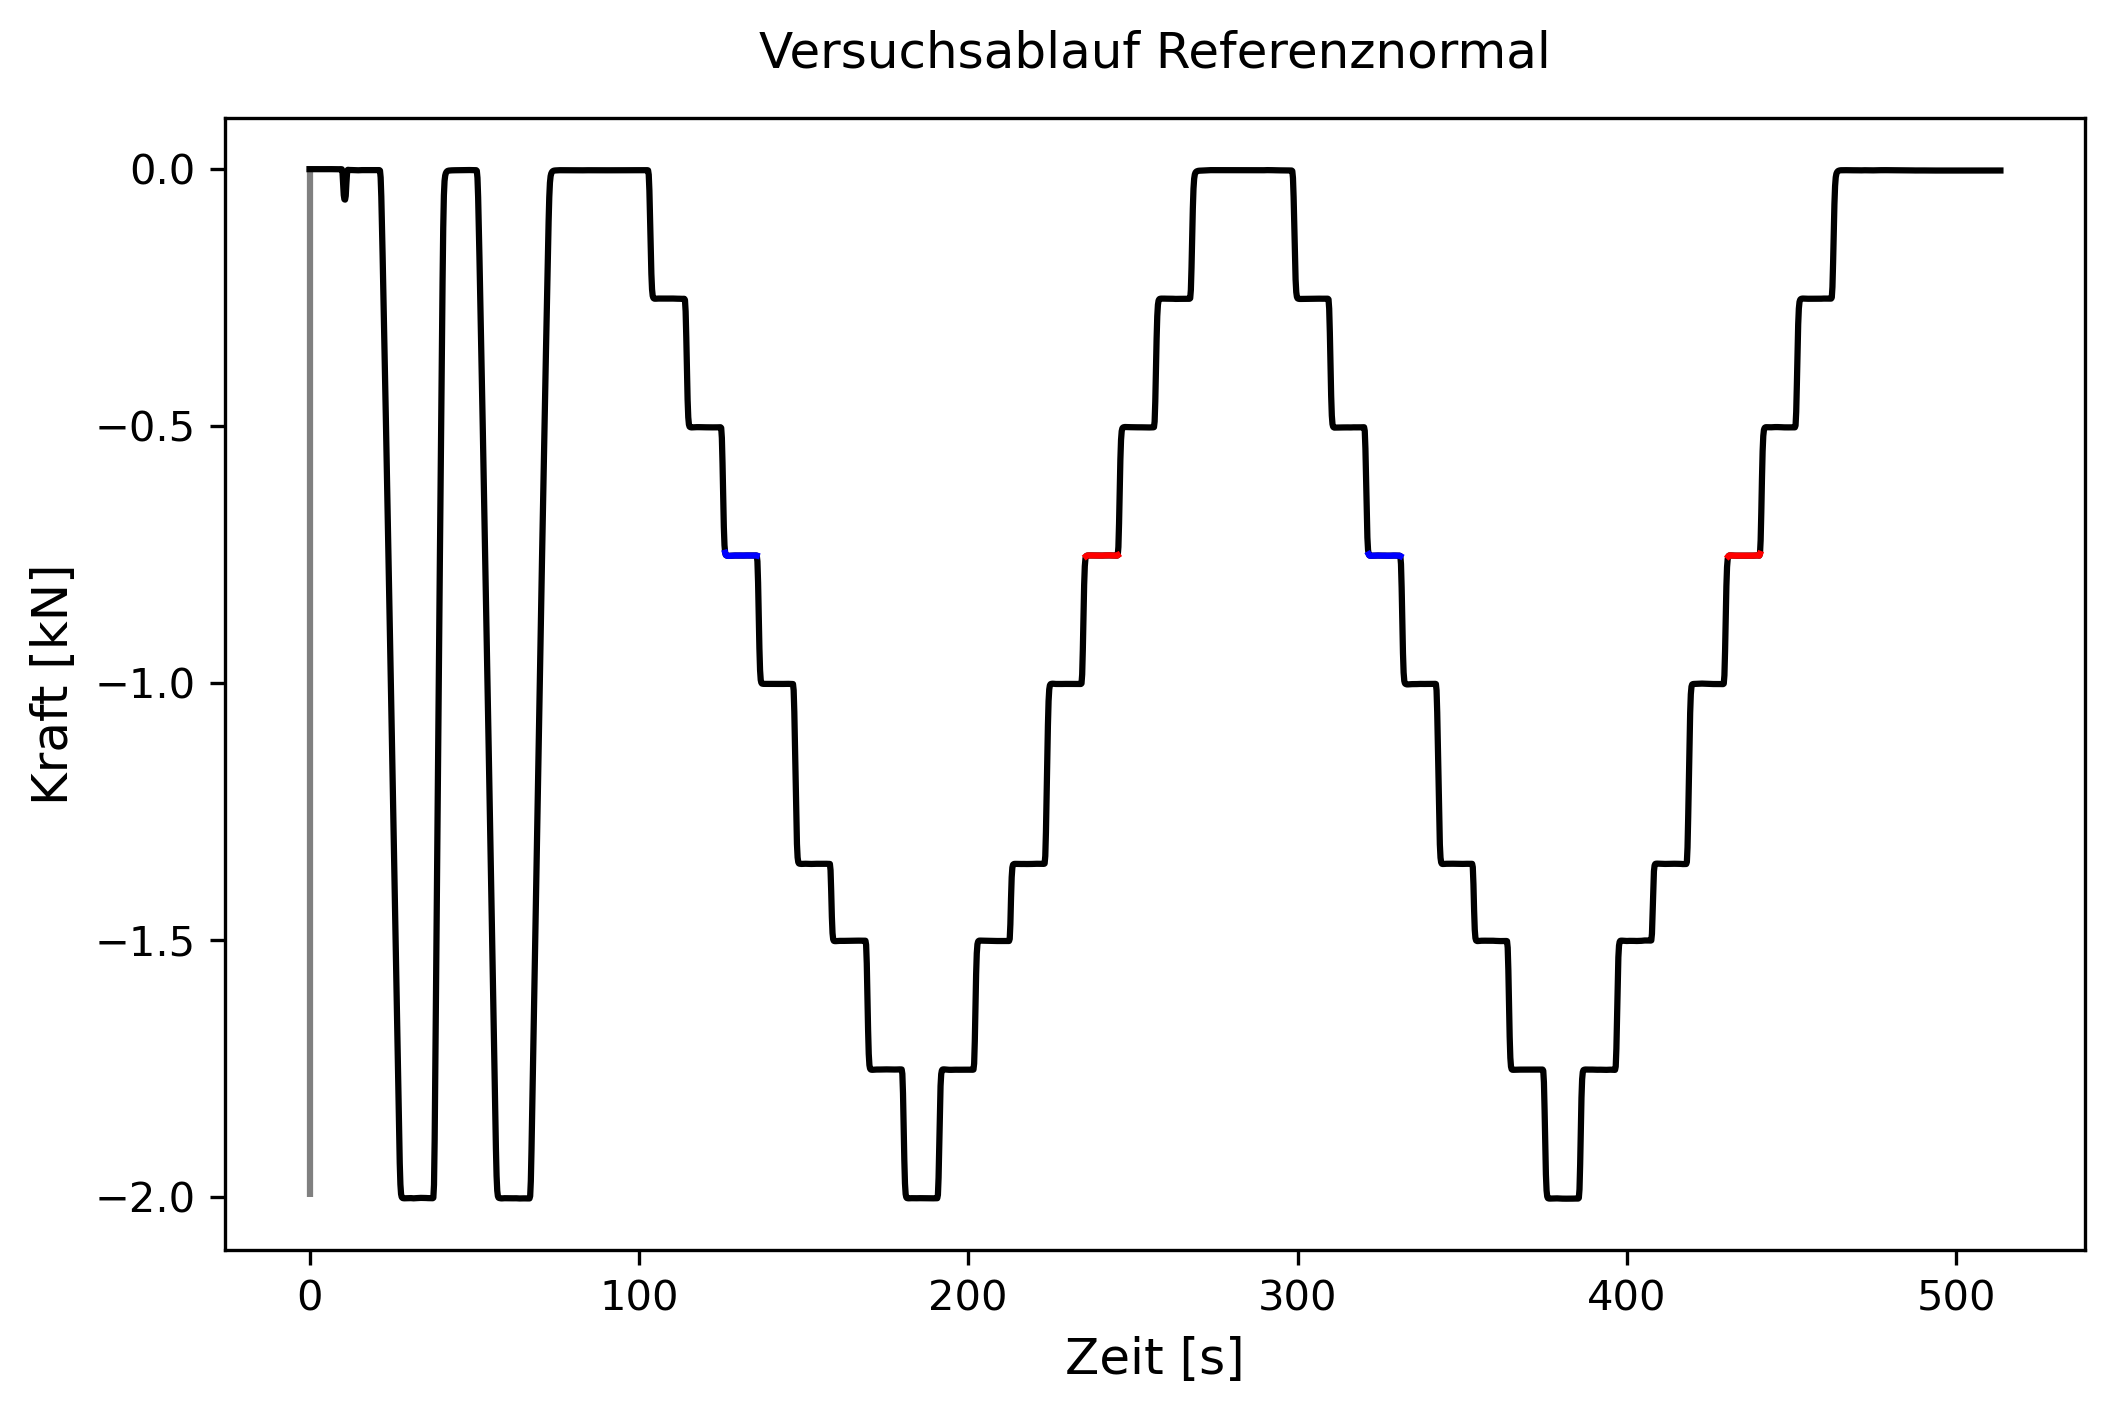

In [23]:
plt.figure(figsize=(8, 5), dpi=300)
plt.plot(Zeit,Referenz,color='black')
plt.plot(X_max_1['Zeit'],X_max_1['Referenz kN'],color='blue')
plt.plot(X_max_2['Zeit'],X_max_2['Referenz kN'],color='red')
plt.plot(X_max_3['Zeit'],X_max_3['Referenz kN'],color='blue')
plt.plot(X_max_4['Zeit'],X_max_4['Referenz kN'],color='red')
plt.vlines(min(Zeit),0,F_max,colors='grey')
plt.title('Versuchsablauf Referenznormal', pad=12,fontsize=12)
plt.xlabel('Zeit [s]' ,fontsize=12,)
plt.ylabel('Kraft [kN]' ,fontsize=12,)
plt.yticks(y_Beschriftung)
plt.show()